# Example 1
## a collection of two-dimensional data, colored according to two different class labels

(-1.3, 5.2999999999999998, -1.3264175491698971, 5.8547685325678387)

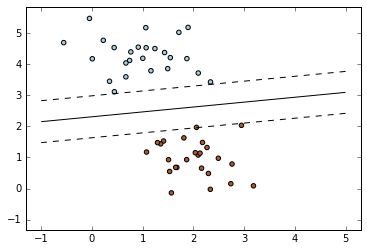

In [78]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.datasets.samples_generator import make_blobs

# we create 50 separable points
X, Y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)

# fit the model
clf = SGDClassifier(loss="hinge", alpha=0.01,
                    n_iter=200, fit_intercept=True)
clf.fit(X, Y)

# plot the line, the points, and the nearest vectors to the plane
xx = np.linspace(-1, 5, 10)
yy = np.linspace(-1, 5, 10)

X1, X2 = np.meshgrid(xx, yy)
Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = clf.decision_function([[x1,x2]])
    Z[i, j] = p[0]

levels = [-1.0, 0.0, 1.0]
linestyles = ['dashed', 'solid', 'dashed']
colors = 'k'

ax = plt.axes()
ax.contour(X1, X2, Z, levels, colors=colors, linestyles=linestyles)
ax.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)

ax.axis('tight')

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()

In [32]:
type(iris)

sklearn.datasets.base.Bunch

In [3]:
iris.keys()

dict_keys(['target_names', 'data', 'DESCR', 'feature_names', 'target'])

In [4]:
iris.data.shape

(150, 4)

In [5]:
iris.data[0]

array([ 5.1,  3.5,  1.4,  0.2])

In [79]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [17]:
import numpy as np
import matplotlib.pyplot as plt

x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target, cmap=plt.cm.get_cmap('RdYlBu', 3))
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])
plt.show()

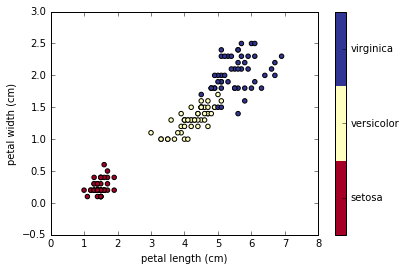

In [47]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x_index = 2
y_index = 3

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: iris.target_names[int(i)])

plt.scatter(iris.data[:, x_index], iris.data[:, y_index],
            c=iris.target, cmap=plt.cm.get_cmap('RdYlBu', 3))
plt.colorbar(ticks=[0, 1, 2], format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(iris.feature_names[x_index])
plt.ylabel(iris.feature_names[y_index])